# Face Detector

## Import Libraries

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
from pathlib import Path
import PIL.Image
import PIL.ImageDraw
import face_recognition

In [3]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("images/people.jpg")
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[199, 216, 223],
        [200, 217, 224],
        [200, 217, 224],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[199, 216, 223],
        [200, 217, 224],
        [201, 218, 225],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[199, 216, 223],
        [201, 218, 225],
        [202, 219, 226],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Because most human faces have roughly the same structure, the pre-trained face detection model will work well for almost any image. There's no need to train a new one from scratch. First, notice on line one, I've already imported the PIL library's image class, and then the image draw class. PIL is the Python Image Library. It lets us easily display an image on the screen, and draw lines on top of the image. We'll use it to display the results of our face detection code. To perform face detection with this library, we just need to load an image file, and then run the image file through the model.

I have found 6 face(s) in this photo.
A face is located at pixel location Top: 163, Right: 605, Bottom: 271, Left: 497
A face is located at pixel location Top: 186, Right: 364, Bottom: 275, Left: 275
A face is located at pixel location Top: 211, Right: 175, Bottom: 319, Left: 67
A face is located at pixel location Top: 295, Right: 760, Bottom: 402, Left: 653
A face is located at pixel location Top: 271, Right: 474, Bottom: 378, Left: 366
A face is located at pixel location Top: 152, Right: 832, Bottom: 259, Left: 724


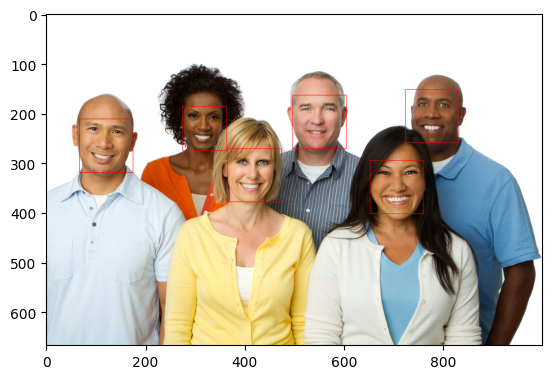

In [6]:
# find all the faces in the image
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)

print("I have found {} face(s) in this photo.".format(number_of_faces))

# Let's loadimage into Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:
    # Print the location of each face in image. Each face is list of coordinate in (top, right, bottom, left)
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Right: {}, Bottom: {}, Left: {}".format(top, right, bottom, left))
    
    # let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline='red')
    
# Display the image on screen
pil_image.show()
imshow(np.asarray(pil_image))

We'll be using PIL, or the Python Image Library to display and draw on top of our image so that we can see each facial feature that we detect. We'll call face_recognition.face_landmarks then we'll pass in the array with the image data, which we called image. Then we'll capture the result as a variable. Well call it face_landmarks_list equals that function call. The result of the function is a list that contains entry for each face found in the image. If no faces were found in the image, the list will be empty. Otherwise, there will be one set of face landmarks for each face that was in the image. Each face will be a Python dictionary object. It's similar to a hashmap or a hashtable in other programming languages. The keys of the dictionary are the names of the facial feature.

I have found 6 faces in this photo.


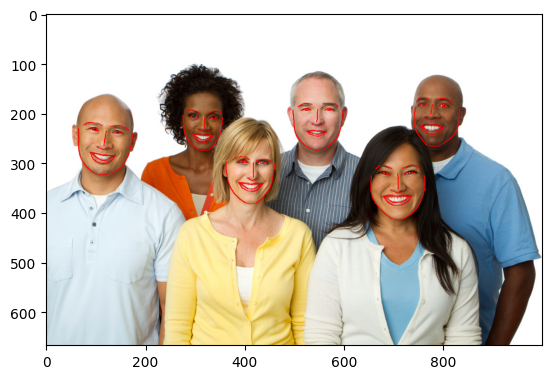

In [13]:
# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

number_of_faces = len(face_landmarks_list)
print("I have found {} faces in this photo.".format(number_of_faces))

pil_image = PIL.Image.fromarray(image)

draw = PIL.ImageDraw.Draw(pil_image)
# Let's loop over each faces
for face_landmarks in face_landmarks_list:
    # let's loop over each facial features (Eye, nose, mouth, lips, etc)
    # print(face_landmarks)
    for name, list_of_points in face_landmarks.items():
        # print(name, list_of_points)
        # lets trace out each facial feature in the image with a line
        draw.line(list_of_points, fill='red', width=2)
        
pil_image.show()
imshow(np.asarray(pil_image))


## Face Encodings

In [14]:
# Generate the face encodings
face_encodings = face_recognition.face_encodings(image)

if len(face_encodings) == 0:
    # No face found in the image.
    print("No faces were found.")

else:
    # Grab the first face encoding
    first_face_encoding = face_encodings[0]
    
    print(first_face_encoding)

[-0.08102002  0.19778648  0.10116202 -0.10768926 -0.08938848 -0.0051124
 -0.02069698 -0.01189597  0.13854286  0.05478634  0.26563567 -0.00901977
 -0.27633318 -0.10323296 -0.13193214  0.20519768 -0.17141552 -0.0534021
 -0.17822698 -0.03385314  0.06798737  0.06815895 -0.02067376  0.01341064
 -0.0798282  -0.29371518 -0.02055131 -0.09726715  0.00150193 -0.13555917
 -0.01348892  0.149285   -0.10260151 -0.09903324  0.04098056  0.04845271
 -0.0095956   0.01337791  0.16898043  0.06358174 -0.13881597  0.08453506
  0.07367077  0.31221765  0.20606795  0.05827205  0.08826714 -0.06527514
  0.12916695 -0.30328029  0.01255909  0.14367844  0.13355717  0.12681633
  0.10245252 -0.15223342 -0.00435856  0.17431585 -0.14850871  0.09651553
  0.02589577 -0.18498759 -0.05150758 -0.09657746  0.15796225  0.03747438
 -0.12108739 -0.03004657  0.16765036 -0.06757218 -0.09263331  0.03642856
 -0.10270913 -0.10475127 -0.3123022   0.06945308  0.35907561  0.19123578
 -0.27626169 -0.03136463 -0.07415473  0.01194138  0.0

## Face Recognition

Let's code a real face recognition system.

First we need pictures of the people that we wanna be able to recognize. I've included sample photos of three people in the project. For pictures of known people, you wanna make sure that there's only one person in the picture and that they are facing the camera, clearly visible, and that there's reasonably good lighting. If you use lower-quality images, the results won't be as accurate.

Instead of just grabbing the first face encoding like we did with our known images, we'll loop over all the face encodings using a for loop. For unknown_face_encoding in unknown_face_encodings, then we can look at each face encoding we find in the unknown image. Now we're ready to compare the known and unknown face encodings. We can do that using the compare_faces function. First we need to pass in our array of known face encodings. We'll pass that in here as the first parameters for our function, and then we need to pass in our unknown face encoding. So we'll pass in unknown_face_encoding from this loop and then we'll save that in a variable called results.

Found Person3 in the photo!


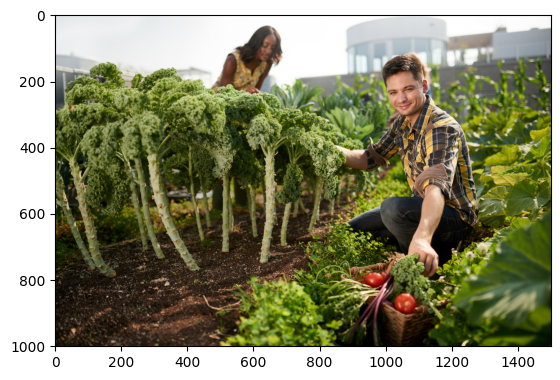

In [20]:
# Load the known images
image_of_person1 = face_recognition.load_image_file("images/person_1.jpg")
image_of_person2 = face_recognition.load_image_file("images/person_2.jpg")
image_of_person3 = face_recognition.load_image_file("images/person_3.jpg")

# Let's get face encodings of each person
person1_face_encoding = face_recognition.face_encodings(image_of_person1)[0]
person2_face_encoding = face_recognition.face_encodings(image_of_person2)[0]
person3_face_encoding = face_recognition.face_encodings(image_of_person3)[0]

# Create a list of all known faces encodings
known_face_encodings = [person1_face_encoding, person2_face_encoding, person3_face_encoding]

# Load the image we want to check
unknown_image = face_recognition.load_image_file("images/unknown_3.jpg")

# get encoding for this unknown image
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

# there might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:
    # Let's check if this unknown face encoding matches with any of above three person we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)
    
    name = 'Unknown'
    
    if results[0]:
        name = 'Person1'
    elif results[1]:
        name= 'Person2'
    elif results[2]:
        name = 'Person3'
    print(f"Found {name} in the photo!")

imshow(np.asarray(unknown_image))

## Applying Digital makeup to face

Our face recognition pipeline has the ability to detect face landmarks. Let's see how we can use face landmarks to do something fun, let's use them to create digital makeup. If you've used any social media applications like Instagram or Snapchat, you might've seen how you can add silly effects to your pictures to make it look like you're wearing makeup or funny hats. Let's create a really simple version of that.

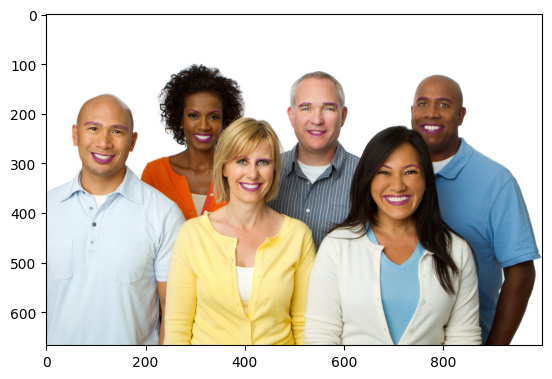

In [25]:
# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = PIL.Image.fromarray(image)

draw = PIL.ImageDraw.Draw(pil_image, 'RGBA')

for face_landmarks in face_landmarks_list:
    # Let's draw line over the eyebrows
    draw.line(face_landmarks['left_eyebrow'], fill=(128, 0, 128, 100), width=3)
    draw.line(face_landmarks['right_eyebrow'], fill=(128, 0, 128, 100), width=3)
    
    # let's draw over lips
    draw.polygon(face_landmarks['top_lip'], fill=(128, 0, 128, 100))
    draw.polygon(face_landmarks['bottom_lip'], fill=(128, 0, 128, 100))

pil_image.show()
imshow(np.asarray(pil_image))

## Finding lookalikes with face recognition

Let's see how we can use face recognition to find lookalikes. Imagine that you wanted to find out which celebrity looks the most like you. You could do that with face recognition by comparing your face to pictures of celebrities. But instead of using face recognition to check for an exact match, you could use it to find out which face is the most similar. The picture with the smallest "face_distance" from your picture should be the celebrity that looks the most like you.

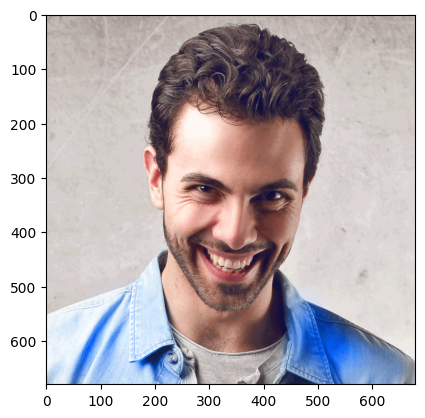

In [30]:
# Let's load the image we want to find similar people for
known_image = face_recognition.load_image_file('images/test_face.jpg')

# Encode known image
known_face_encoding = face_recognition.face_encodings(known_image)[0]

# variable to keep track of the most similar face match we've found
best_face_distance = 1.0
best_face_image = None

for image_path in Path("images/training").glob("*.png"):
    # Load an image to check
    unknown_image = face_recognition.load_image_file(image_path)
    unknown_face_encoding = face_recognition.face_encodings(unknown_image)
    
    # get the face distance between known and unknown person's face in this image
    face_distance = face_recognition.face_distance(unknown_face_encoding, known_face_encoding)[0]
    
    if face_distance < best_face_distance:
        # Save the new best face distance and image
        best_face_distance = face_distance
        best_face_image = unknown_image
pil_image = PIL.Image.fromarray(best_face_image)

pil_image.show()
imshow(np.asarray(pil_image))